# Phase diff of incoming tilted,shifted Gaussian on local Gaussian for inf. half-plane PD

To second-order in $\alpha$, the expression is

\begin{align*}
		\sum_{n,m} u_{nm}(x,y,0)=&
			\left[
				1+
				i \frac{ k a \alpha}{ 2}
			\right]
			u_{00}
			+
			\left[
			\frac{a}{w_{0}}		
			+
			i  \frac{k w_{0} \alpha}{2}	
			\right]			
			u_{10}
			+
			i  
				\frac{\sqrt{2} k a \alpha}{ 2}
			u_{20}
			\\  &
	-\alpha^2  (k w_0)^2 
		[ \frac{1}{2 \sqrt{2}} u_{20}
		+
		\frac{1}{4} u_{00}
		]	
		-\alpha^2  (k^2 a w_0)
	[	
	 \frac{ 1} {4} u_{30}
	+ \frac{3}{4} u_{10}
	]
				 \; .
\end{align*}

In [2]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt
from scipy.special import erfi as erfi
pi=np.pi

import scipy.io

In [3]:
mat = scipy.io.loadmat('Paul_compare_variables.mat')
for x in mat:
  print(x)

__header__
__version__
__globals__
Description_String
Paul_Regular_DWS_10
Paul_Regular_DWS_100
Paul_Regular_LPS_10
Paul_Regular_LPS_100
Paul_Total_LPS_10
Paul_Total_LPS_100
Paul_Weighted_DWS_10
Paul_Weighted_DWS_100
Paul_Weighted_LPS_10
Paul_Weighted_LPS_100


In [27]:
angle_alex= np.linspace(-2e-6,2e-6,101)
DWS_10 = mat['Paul_Regular_DWS_10'].ravel()
LPS_10 = mat['Paul_Regular_LPS_10'].ravel()
DWS_100 = mat['Paul_Regular_DWS_100'].ravel()
LPS_100 = mat['Paul_Regular_LPS_100'].ravel()
LPS_100W = mat['Paul_Weighted_LPS_100'].ravel()
DWS_100W = mat['Paul_Weighted_DWS_100'].ravel()

### input

In [5]:
#spot, wavelength, shift
w= 1e-3
lam= 1064e-9
a = 100e-6  #100 micron shift
k = 2*pi/lam

#alpha(10nrad)
alpha_min=-200e-6
alpha_max=200e-6
num_points = 101
alpha = np.linspace(alpha_min,alpha_max,num = num_points)

## PLOT SCALES AND LABELS
micro = 10**(6)
nano = 10**(9)
cycle = 1/(2*pi)
rad = 1
xlab = 'u'
ylab = 'rad'

##SET SCALES
alpha_scale = micro
phase_scale = rad

if(alpha_scale==nano):
    xlab = 'n'
if(phase_scale==cycle):
    ylab = 'cycles'

### phase diff vs. angle

# 2nd order tilt

The phase difference:

\begin{align*}
	\Delta \phi = &
		 \frac{1}{2} 
		 \left[
		 	\phi_R - \phi_L
		 \right]
		 \\ = &
		 \frac{1}{2}
		 \left[
							\arctan
				\left[
					\frac
					{ \frac{\pi \alpha}{\lambda}
					\left[
						a 
						+
						\sqrt{\frac{2}{\pi}} w_0
					\right]}					
				{1
				+
				 \sqrt{\frac{2}{\pi}} \frac{a}{w_0}
				 		-\frac{1}{16}\alpha^2 k^2 
	[
	 w_0^2
	+ 
	a w_0(
		\frac{1}{4}
	\sqrt{\frac{2}{\pi}}
	)
	]			 
				 }
				\right]
		-
			\arctan
				\left[
					\frac
					{ \frac{\pi \alpha}{\lambda}
					\left[
						a 
						-
						\sqrt{\frac{2}{\pi}} w_0
					\right]}					
				{1
				-
				 \sqrt{\frac{2}{\pi}} \frac{a}{w_0}
	-\frac{1}{16}
	\alpha^2 k^2 
	[
	 w_0^2
	- 
	a w_0(
		\frac{1}{4}
	\sqrt{\frac{2}{\pi}}
	)
	]			 
				 }
				\right]
			\right]							 	
\end{align*}

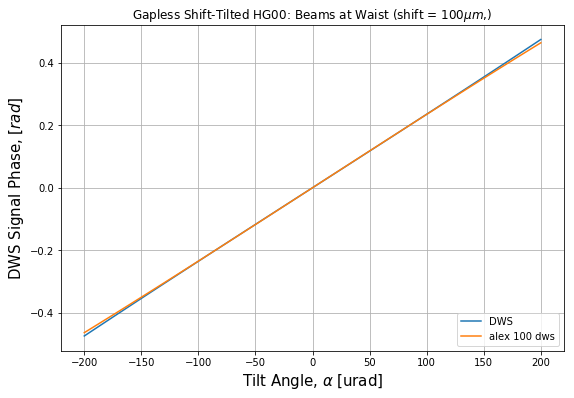

In [6]:
#function    
def phase_diff(alpha):
    phase_result=(0.50*(phi_r(alpha)-phi_l(alpha) ))
    return(phase_result)

def gws(alpha):
    gws_result=(0.50*(phi_r(alpha)+phi_l(alpha) ))
    return(gws_result)

def second_order_tilt_r(alpha):
    result= ((1/16)*alpha**2 * k**2 * 
                        (
                            w**2 + a*w* ( (1/4) *np.sqrt(2/pi))
                        )
            )
    return(result)

def second_order_tilt_l(alpha):
    result= ((1/16)*alpha**2 * k**2 * 
                        (
                            w**2 - a*w* ( (1/4)*np.sqrt(2/pi))
                        )
            )
    return(result)

def phi_r(alpha):
    return(np.arctan 
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2/pi)*(a/w)
                        -
                        second_order_tilt_r(alpha)
                    )
            )
    )

def phi_l(alpha):
    return(np.arctan 
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
            )  
                /
            (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
                    -
                    second_order_tilt_l(alpha)
            )
        )
    )

dws2=phase_diff(alpha)
lps2=gws(alpha)

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha*alpha_scale, dws2, label='DWS') 
plt.plot(alpha*alpha_scale, DWS_100, label='alex 100 dws' )

plt.legend(loc='lower right')

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'DWS Signal Phase, $ [' + ylab + ']$', fontsize=15) 
plt.title(r'Gapless Shift-Tilted HG00: Beams at Waist (shift = 100$\mu m$,)') 
plt.grid() 
#plt.savefig("tilt-shift-waist-2tilt.pdf")


### Computed Deriv. (just checking the previous)
$\frac{d \Delta \phi}{d \alpha}$

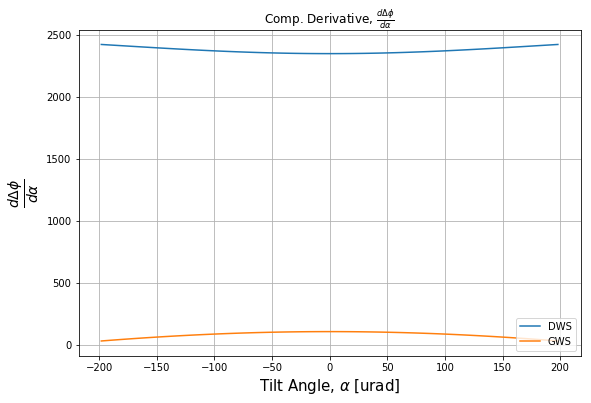

In [7]:
#function
comp_phase_diff_deriv = np.diff(dws2) / np.diff(alpha)
comp_dws_deriv = np.diff(lps2) / np.diff(alpha)
alpha2 = (alpha[:-1] + alpha[1:]) / 2

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha2*alpha_scale, comp_phase_diff_deriv*phase_scale, label='DWS') 
plt.plot(alpha2*alpha_scale, comp_dws_deriv*phase_scale, label='GWS')
plt.legend(loc='lower right')
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]',fontsize=15) 
plt.ylabel(r'$ \frac{d \Delta \phi}{d \alpha}$', fontsize=20) 
plt.title(r'Comp. Derivative, $\frac{d \Delta \phi}{d \alpha}$') 
plt.grid()
#plt.savefig("tilt-shift-waist-2tilt-DER.pdf")


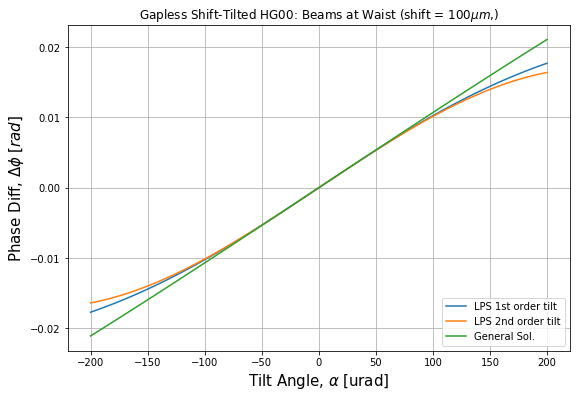

In [8]:
#function    
def phase_diff(alpha):
    phase_result=(0.50*(phi_r(alpha)-phi_l(alpha) ))
    return(phase_result)

def gws(alpha):
    gws_result=(0.50*(phi_r(alpha)+phi_l(alpha) ))
    return(gws_result)

def second_order_tilt_r(alpha):
    result= ((1/16)*alpha**2 * k**2 * 
                        (
                            w**2 + a*w* ( 5*np.sqrt(2/pi))
                        )
            )
    return(result)

def second_order_tilt_l(alpha):
    result= ((1/16)*alpha**2 * k**2 * 
                        (
                            w**2 - a*w* ( 5*np.sqrt(2/pi))
                        )
            )
    return(result)

def phi_r(alpha):
    return(np.arctan 
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2/pi)*(a/w)
                    )
            )
    )

def phi_l(alpha):
    return(np.arctan 
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
            )  
                /
            (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
            )
        )
    )

dws = phase_diff(alpha)
lps = gws(alpha)

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha*alpha_scale, lps, label='LPS 1st order tilt') 
plt.plot(alpha*alpha_scale, lps2, label='LPS 2nd order tilt') 
plt.plot(alpha*alpha_scale, LPS_100, label='General Sol.' )

plt.legend(loc='lower right')

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' + ylab + ']$', fontsize=15) 
plt.title(r'Gapless Shift-Tilted HG00: Beams at Waist (shift = 100$\mu m$,)') 
plt.grid() 
#plt.savefig("tilt-shift-waist-2tilt.pdf")


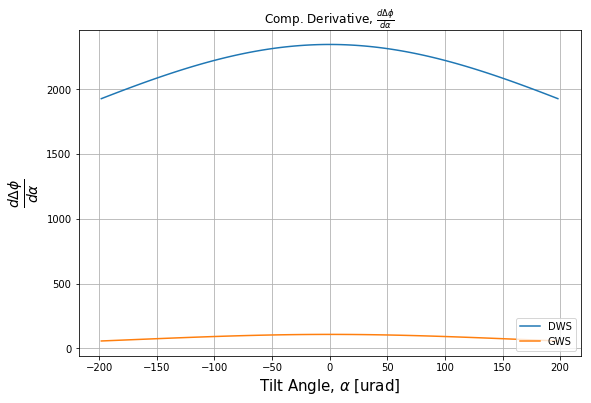

In [9]:
#function
comp_phase_diff_deriv = np.diff(dws) / np.diff(alpha)
comp_dws_deriv = np.diff(lps) / np.diff(alpha)
alpha2 = (alpha[:-1] + alpha[1:]) / 2

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha2*alpha_scale, comp_phase_diff_deriv*phase_scale, label='DWS') 
plt.plot(alpha2*alpha_scale, comp_dws_deriv*phase_scale, label='GWS')
plt.legend(loc='lower right')
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]',fontsize=15) 
plt.ylabel(r'$ \frac{d \Delta \phi}{d \alpha}$', fontsize=20) 
plt.title(r'Comp. Derivative, $\frac{d \Delta \phi}{d \alpha}$') 
plt.grid()
#plt.savefig("tilt-shift-waist-2tilt-DER.pdf")


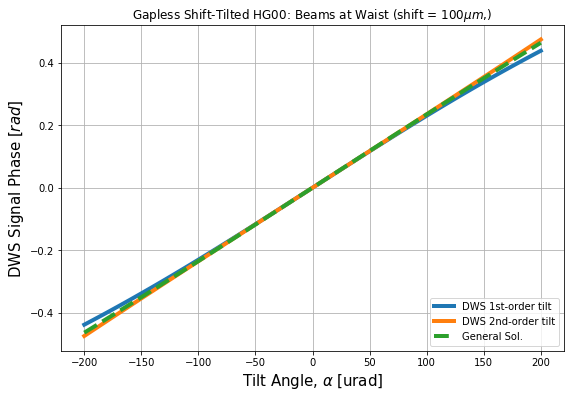

In [31]:
#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha*alpha_scale, dws,linewidth=4, label='DWS 1st-order tilt')
plt.plot(alpha*alpha_scale, dws2,linewidth=4, label='DWS 2nd-order tilt')
plt.plot(alpha*alpha_scale, DWS_100, "--",linewidth=4,  label='General Sol.' )



plt.legend(loc='lower right')

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'DWS Signal Phase $[' + ylab + ']$', fontsize=15) 
plt.title(r'Gapless Shift-Tilted HG00: Beams at Waist (shift = 100$\mu m$,)') 
plt.grid() 
#plt.savefig("tilt-shift-waist-2tilt.pdf")

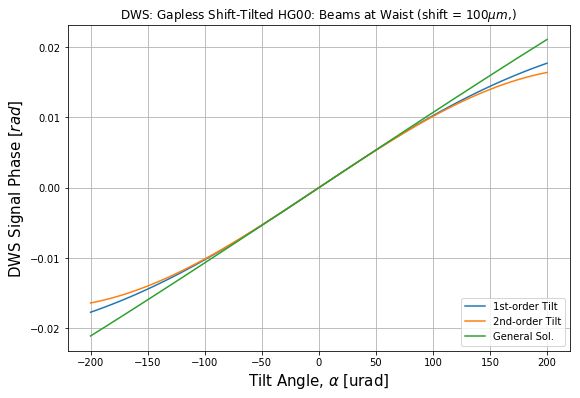

In [11]:
#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha*alpha_scale, lps, label='1st-order Tilt') 
plt.plot(alpha*alpha_scale, lps2, label='2nd-order Tilt') 
plt.plot(alpha*alpha_scale, LPS_100, label='General Sol.' )

plt.legend(loc='lower right')

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'DWS Signal Phase $[' + ylab + ']$', fontsize=15) 
plt.title(r'DWS: Gapless Shift-Tilted HG00: Beams at Waist (shift = 100$\mu m$,)') 
plt.grid() 
#plt.savefig("tilt-shift-waist-2tilt.pdf")

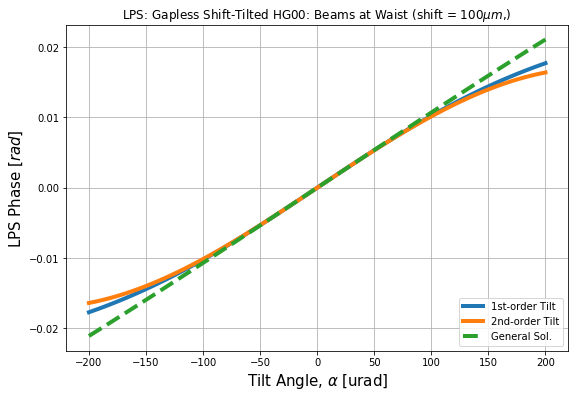

In [29]:
#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha*alpha_scale, lps,linewidth=4, label='1st-order Tilt') 
plt.plot(alpha*alpha_scale, lps2, linewidth=4, label='2nd-order Tilt') 
plt.plot(alpha*alpha_scale, LPS_100,"--", linewidth=4, label='General Sol.' )


plt.legend(loc='lower right')

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'LPS Phase $[' + str(ylab) + ']$', fontsize=15) 
plt.title(r'LPS: Gapless Shift-Tilted HG00: Beams at Waist (shift = 100$\mu m$,)') 
plt.grid() 
#plt.savefig("tilt-shift-waist-2tilt.pdf")

In [13]:
print(alpha)

[-2.00000000e-04 -1.96000000e-04 -1.92000000e-04 -1.88000000e-04
 -1.84000000e-04 -1.80000000e-04 -1.76000000e-04 -1.72000000e-04
 -1.68000000e-04 -1.64000000e-04 -1.60000000e-04 -1.56000000e-04
 -1.52000000e-04 -1.48000000e-04 -1.44000000e-04 -1.40000000e-04
 -1.36000000e-04 -1.32000000e-04 -1.28000000e-04 -1.24000000e-04
 -1.20000000e-04 -1.16000000e-04 -1.12000000e-04 -1.08000000e-04
 -1.04000000e-04 -1.00000000e-04 -9.60000000e-05 -9.20000000e-05
 -8.80000000e-05 -8.40000000e-05 -8.00000000e-05 -7.60000000e-05
 -7.20000000e-05 -6.80000000e-05 -6.40000000e-05 -6.00000000e-05
 -5.60000000e-05 -5.20000000e-05 -4.80000000e-05 -4.40000000e-05
 -4.00000000e-05 -3.60000000e-05 -3.20000000e-05 -2.80000000e-05
 -2.40000000e-05 -2.00000000e-05 -1.60000000e-05 -1.20000000e-05
 -8.00000000e-06 -4.00000000e-06 -2.71050543e-20  4.00000000e-06
  8.00000000e-06  1.20000000e-05  1.60000000e-05  2.00000000e-05
  2.40000000e-05  2.80000000e-05  3.20000000e-05  3.60000000e-05
  4.00000000e-05  4.40000